# Lab Segmentation 1

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

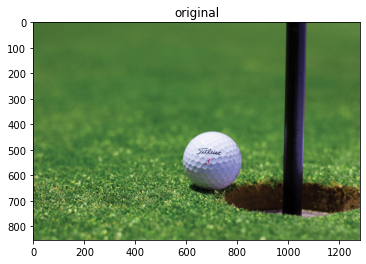

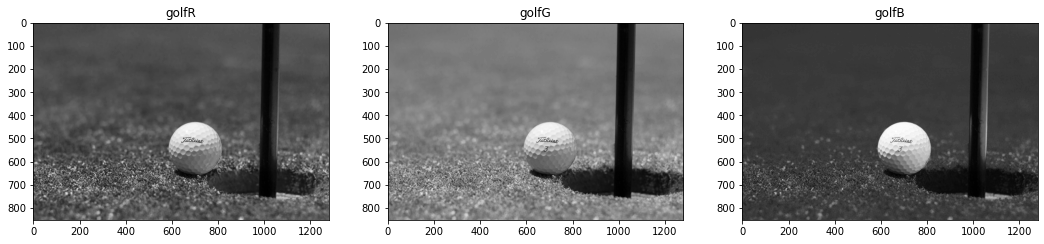

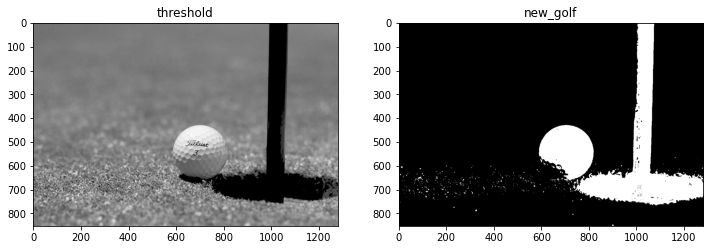

In [22]:
# 1- Read the image
# read image golf
golfo = io.imread('imgs/exp1/golf.jpeg')
golf = golfo.astype(float)

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
golfR = golf[:,:,0]
golfG = golf[:,:,1]
golfB = golf[:,:,2]

# 3- Visually detect the dominating color channel (C) for the backgroung (R, G or B)
show_images([golfo],["original"])
show_images([golfR,golfG, golfB], ["golfR","golfG", "golfB"])
# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
threshold = 50
golfG_thrsh = np.copy(golfG)
golfG_thrsh[golfG_thrsh < threshold] = 0
# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
# will be binary 0 if green is dominant, 1 otherwise
new_golf = np.copy(golfG)
golfMaxRB = np.maximum(golfB, golfR)
new_golf[golfG <= golfMaxRB] = 1
new_golf[new_golf > golfMaxRB] = 0
# 6- display the binarized image
show_images([golfG_thrsh, new_golf],["threshold", "new_golf"])

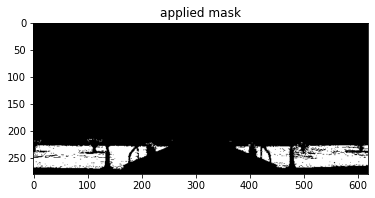

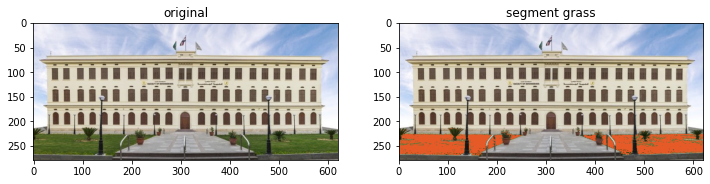

In [21]:
# 1- Get the required RGB color to segment (Using a color picker)
grass = np.array([65, 105, 30])

# 2- Read image
cufe = (io.imread('imgs/exp2/cufe.jpg'))

# 3- extract R, G and B channels (as float)
cufeR = cufe[:,:,0].astype(float)
cufeG = cufe[:,:,1].astype(float)
cufeB = cufe[:,:,2].astype(float)
# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
cufeR = cufeR - grass[0]
cufeG = cufeG - grass[1]
cufeB = cufeB - grass[2]
# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
distances = np.sqrt(cufeR**2 + cufeG**2 + cufeB**2)
threshold = 37

# 6-  create a mask by thresholding the differences
mask = distances < threshold
# if distance is low then this is grass
show_images([mask],["applied mask"])

# 7- In the  input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
new_cufe = np.copy(cufe)
# segmentation color
new_cufe[mask] = [230,90,40]

# 8- show the image or save it
show_images([cufe,new_cufe],["original","segment grass"])